In [ ]:
import torch

#### 텐서 조작하기

In [ ]:
# max() 함수로 최댓값 반환
# argmax() 함수로 최댓값의 index를 반환

In [ ]:
# Size() 함수로 tensor의 shape를 변경하는 것이 가능
# view (tensor의 shape 변경하기)
tf = torch.IntTensor( # 실수값을 넣고 싶으면 FloatTensor로 사용
    [[1,2,3],
     [4,5,6],
     [7,8,9]]
)
tf.shape # torch.Size([3, 3])
tf.view((-1, 9)) # tensor([[1,2,3,4,5,6,7,8,9]], dtype = torch.int32)

In [ ]:
# squeeze(shape가 -1인, 즉 차원이 -1이면 제거한다.)
tf = tf.FloatTensor(
    [[0.],
     [1.],
     [2.]]
)
tf.Size([3,1])
tf.squeeze()

In [ ]:
# unsqueeze(특정 위치에 1인 차원을 추가한다. -> squeeze와 정반대의 개념)
ft = torch.Tensor([0,1,2])
ft.shape # torch.SIze([3])
ft.unsqueeze(0)

torch.Size([3])

In [ ]:
# view(), squeeze(), unsqueeze()의 함수들은 모두 tensor의 원소수를 그대로 유지하면서 모양과 차원을 조절한다.

# cat() -> 두 tensor을 연결(concatenate)한다, stack() -> tensor을 순차적으로 쌓는다.
x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])

torch.cat([x,y], dim = 0) # 첫번째 차원을 늘려준다.(dim의 값을 무엇으로 설정하느냐에 따라서 달라짐)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])

In [ ]:
torch.stack([x,y])
# 결국 torch.stack() 함수는 torch.cat([x.unsqueeze(0), y.unsqueeze(0)], dim = 0)과 동일한 의미를 갖는다.

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [ ]:
# ones-like(), zeros-like() 함수 (각각 0으로 채워진 tensor, 1로 채워진 tensor을 반환한다.)
# 단, 괄호 안에 새로운 다른 tensor을 넣는 것이다.
# 즉, 입력해주는 tensor과 동일한 크기의 tensor을 만들 수 있는 것이다.


In [ ]:
# in-place operation
# 기존 값에 덮어쓰기를 하게 된다.
# 모든 연산에 해당이 되는데, 함수의 끝에 _ 를 붙여주면 덮어씌워지게 되는 것이다.

x = torch.FloatTensor([[1,2],[3,4]])
print(x.mul(2))

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x) # 그냥 mul()을 적용하면 x는 그대로임이 확인 가능

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
x.mul_(2)
print(x)

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
class Calculator:
  def __init__(self):
    self.result = 0
  def add(self, x):
    self.result += x
    return self.result

calc1 = Calculator()
calc2 = Calculator()
# 이렇게 class를 이용하면 객체를 원하는 만큼 만들 수 있기 떄문에 독립적인 객체를, 굳이 함수를 여러개 만들지 않고도 구현이 가능해서 유용하다.

#### 선형회귀 구현(학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일)

In [ ]:
import torch
import torch.utils as utils
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1) # 다음에도 이 프로그램을 실행 했을 때에 값이 그대로 출력이 될 수 있도록

x_train = torch.FloatTensor([[1,2], [3,4], [5,6]])
y_train = torch.FloatTensor([[3,5], [7,9], [11,13]])

# requires_grad = True가 적용된 텐서에 연산을 하게 되면, 게산 그래프가 생성이 되어서 backward함수를 호출하면 그래프로부터 자동으로 미분 연산이 가능해 진다.
W = torch.zeros(2, requires_grad = True)
b = torch.zeros(2, requires_grad = True)

optimizer = torch.optim.SGD([W,b], lr = 0.001, momentum = 0.7)

epochs = 2000
for step in range(epochs):
  predict = x_train*W + b
  cost = torch.mean((predict-y_train)**2)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if step % 100 == 0:
    print(W, b, cost)








tensor([0.0263, 0.0413], requires_grad=True) tensor([0.0070, 0.0090], requires_grad=True) tensor(75.6667, grad_fn=<MeanBackward0>)
tensor([2.0896, 2.1115], requires_grad=True) tensor([0.5798, 0.4808], requires_grad=True) tensor(0.0417, grad_fn=<MeanBackward0>)
tensor([2.1011, 2.1071], requires_grad=True) tensor([0.6134, 0.5040], requires_grad=True) tensor(0.0347, grad_fn=<MeanBackward0>)
tensor([2.0943, 2.1023], requires_grad=True) tensor([0.6402, 0.5261], requires_grad=True) tensor(0.0309, grad_fn=<MeanBackward0>)
tensor([2.0878, 2.0977], requires_grad=True) tensor([0.6650, 0.5472], requires_grad=True) tensor(0.0275, grad_fn=<MeanBackward0>)
tensor([2.0817, 2.0934], requires_grad=True) tensor([0.6881, 0.5674], requires_grad=True) tensor(0.0245, grad_fn=<MeanBackward0>)
tensor([2.0761, 2.0892], requires_grad=True) tensor([0.7097, 0.5867], requires_grad=True) tensor(0.0219, grad_fn=<MeanBackward0>)
tensor([2.0708, 2.0852], requires_grad=True) tensor([0.7297, 0.6051], requires_grad=True)

In [ ]:
# 클래스로 pytorch model 구현하기
import torch
import torch.nn.Functional as F

model = torch.nn.Linear(1, 1)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)
    # 다중 선형 회귀라면, 만약에 입력 x의 차원이 3이면 (3,1)의 크기라면 self.linear = nn.Linear(3, 1)로 바꾸어준다.

  def forward(self, x):
    return self.linear(x)

model = LInearRegressionModel()


In [ ]:
# mini batch와 data load
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.Functional as F

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

dataset = TensorDataset(x_train, y_train)
# dataset을 만들었다면 이제 dataloader을 적용해주면 된다.
# dataloader의 경우에는 일반적으로 dataset과 mini batch size를 입력 받는다.

dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

model = nn.LInear(3, 1) # 입력 데이터의 차원의 0번째 개수가 model이 입력받는 데이터의 개수(한번에) 이기 떄문에 
# nn.LInear()의 괄호에 들어가는 수가 3이다.

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epoch = 20
for step in range(epoch):
  for idx, data in enumerate(dataset):
    x_train, y_train = data
    prediction = model(x_train)

    cost = T.mse_loss(prediction, y_train)

    optimizer.zero_grad() # gradient를 매 epoch마다 0으로 초기화(쌓이는 것 방지)
    cost.backward()
    optimizer.step()

In [ ]:
# custom dataset
class CustomDataset(nn.Module):
  def __init__(self):
    # dataset의 전처리를 해주는 부분
    self.x_data = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
    self.y_data = torch.FloatTensor([[152], [185], [180], [196], [142]])

  def __len__(self):
    # dataset의 길이, 즉 총 sample의 수를 적어주는 부분
    return len(self.x_data)

  def __getitem__(self, idx):
    # dataset에서 특정 1개의 sample을 가져오는 함수
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return (x, y)

##### softmax regression을 이용해서 MNIST DATA분류하기

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
# torchvision.transforms는 torch.tensor이나 PIL이미지 데이터에 colorjitter이나 greyscale, crop등의 전처리및 변형을 가할 수 있는 함수가 저장된 library 이다.
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다 : ", device)

random.seed(777)
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

epoch = 15
batch_size = 100

mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

dataloader = DataLoader(mnist_train, batch_size = batch_size,
                     shuffle = True, drop_last = True)
# 위의 dataset을 만드는 과정에서 drop_last = True를 설정하는 이유는
# 만약에 mini_batch의 크기 만큼 나누어서 학습을 시키다가 남는 것이 발생할 경우에 마지막 배치가 상대적으로 과대 평가 되는 것을 막기 위해서이다.

linear = torch.nn.Linear(784, 10, bias = True).to(device)

# torch.nn.functional.croee_entropy()를 이용해도 아래의 코드와 같은 결과를 불러온다.
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for step in range(epoch):
  avg_cost = 0
  total_batch = len(dataloader)

  for x, y in dataloader:
    x = x.view(-1, 28*28).to(device)
    y = y.to(device) # one-hot encoding된 데이터 -> 이래야 softmax를 적용하는 것이 유리하고, pytorch의 crossentropy에 내장되어 있다.

    optimizer.zero_grad()
    predict = linear(x)
    cost = criterion(predict, y)

    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch
    

  print('cost : {:.4f}'.format(avg_cost))
print('The END')





다음 기기로 학습합니다 :  cpu


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)



cost : 0.5349
cost : 0.3593
cost : 0.3311
cost : 0.3166
cost : 0.3071
cost : 0.3002
cost : 0.2949
cost : 0.2908
cost : 0.2874
cost : 0.2846
cost : 0.2818
cost : 0.2799
cost : 0.2778
cost : 0.2760
cost : 0.2744
The END


Accuracy :  0.8867999911308289
Label :  5
Prediction :  5


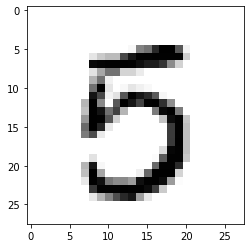

In [9]:
with torch.no_grad(): # 이렇게 설정해 주어야만 gradient계산을 수행하지 않는다.
  x_test = mnist_test.data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.targets.to(device)

  import numpy as np
  prediction = linear(x_test)
  correct_prediction = np.argmax(prediction, 1) == y_test # argmax()함수는 두 값중 더 큰 값의 index를 반환한다.
  accuracy = correct_prediction.float().mean()
  print('Accuracy : ', accuracy.item())
  
  r = random.randint(0, len(mnist_test)-1) # random.randint(a,b)를 하면 a이상 b이하의 수들 중 랜덤하게 정수를 하나 뽑는다.
  x_single = mnist_test.data[r:r+1].view(-1, 28*28).float().to(device)
  y_single = mnist_test.targets[r].to(device)
  print('Label : ', y_single.item())
  single_prediction = linear(x_single)
  print('Prediction : ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.data[r:r+1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()



#### Model을 이용해서 KMNIST dataset구분해 보기

In [10]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

learning_rate = 1e-5
epochs = 20
batch_size = 100

kmnist_train = dsets.KMNIST(root = 'KMNIST_data/', train = True, download = True, transform = transforms.ToTensor())
kmnist_test = dsets.KMNIST(root = 'KMNIST_data/', train = False, download = True, transform = transforms.ToTensor())

data_loader = torch.utils.data.DataLoader(
    dataset = kmnist_train, batch_size = batch_size, shuffle = True, drop_last = True
)


Extracting KMNIST_data/KMNIST/raw/train-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/train-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw


Extracting KMNIST_data/KMNIST/raw/t10k-images-idx3-ubyte.gz to KMNIST_data/KMNIST/raw




Extracting KMNIST_data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to KMNIST_data/KMNIST/raw
Processing...
Done!


In [12]:
kmnist_train.data.shape

torch.Size([60000, 28, 28])

In [15]:
max(kmnist_train.targets)

tensor(9)

In [35]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.keep_prob = 0.5

    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1, padding = 1),
        torch.nn.ReLU(), # covolutional layer의 경우에는 ReLU를 먼저 시도하고 완전 연결층으로만 이루어진 경우에는 SeLU를 먼저 시도한다.
        torch.nn.MaxPool2d(2, 2)
    )

    self.layer2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2, padding = 1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2)
    )

    self.layer3 = torch.nn.Sequential(
        torch.nn.Conv2d(64, 128, 3, 1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2, padding = 1) 
    )

    self.fc1 = torch.nn.Linear(128, 128, bias = True)
    torch.nn.init.xavier_uniform(self.fc1.weight)
    self.layer4 = torch.nn.Sequential(
        self.fc1,
        torch.nn.ReLU(),
        torch.nn.Dropout(p = 1-self.keep_prob)
    )
    self.fc2 = torch.nn.Linear(128, 10, bias = True) # 일반적인 MNIST데이터셋과 마찬가지로 총 10개의 문자로 class가 구분이 될 수 있다.
    # Linear 회귀의 경우에는 sigmoid activation function을 사용하기 때문에 가중치 초기화의 방법으로 xavier (= Glorot initialization)을 사용한다.
    torch.nn.init.xavier_uniform(self.fc2.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.size(0), -1)
    out = self.layer4(out)
    out = self.fc2(out)
    return out




In [36]:
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

total_batch = len(data_loader)

for step in range(epochs):
  avg_cost = 0

  for x, y in data_loader:
    x = x.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    prediction = model(x)
    cost = criterion(prediction, y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
print('END')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


END


In [40]:
with torch.no_grad():
  x_test = kmnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
  y_test = kmnist_test.targets.float().to(device)

  prediction  = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()

  print('Accuracy : ', accuracy.item())


Accuracy :  0.6107000112533569
